In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv('Problem1.csv')

In [3]:
import seaborn as sns

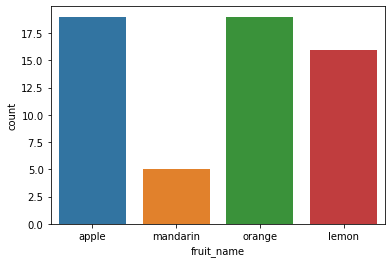

In [4]:
sns.countplot(df1['fruit_name'],label="Count")

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
df = df1.select_dtypes(exclude=['object'])

In [7]:
print(df.head())

   fruit_label  mass  width  height  color_score
0            1   192    8.4     7.3         0.55
1            1   180    8.0     6.8         0.59
2            1   176    7.4     7.2         0.60
3            2    86    6.2     4.7         0.80
4            2    84    6.0     4.6         0.79


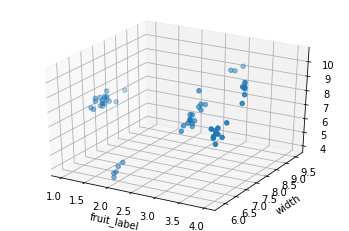

In [8]:
from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df['fruit_label'],df['width'],df['height'])
plt.xlabel("fruit_label")
plt.ylabel('width')
plt.show()

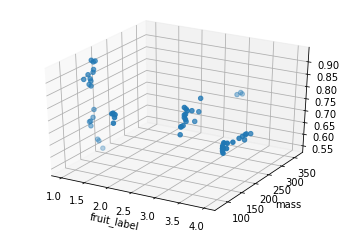

In [9]:
from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df['fruit_label'],df['mass'],df['color_score'])
plt.xlabel("fruit_label")
plt.ylabel('mass')
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'fruit_label'], df['fruit_label'], stratify=df['fruit_label'], random_state=60, test_size=.2)

In [11]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [12]:
for n_neighbors in neighbors_settings:
    knc = KNeighborsClassifier(n_neighbors=n_neighbors)
    knc.fit(X_train_scale, y_train)
    training_accuracy.append(knc.score(X_train_scale, y_train))
    test_accuracy.append(knc.score(X_test_scale, y_test))

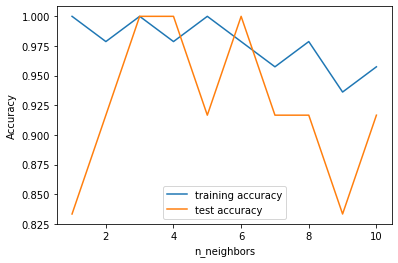

In [13]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [14]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train_scale, y_train)
print('Accuracy of K-N classifier on training set: {:.2f}'.format(knc.score(X_train_scale, y_train)))
print('Accuracy of K-N classifier on test set: {:.2f}'.format(knc.score(X_test_scale, y_test)))

Accuracy of K-N classifier on training set: 1.00
Accuracy of K-N classifier on test set: 1.00


In [15]:
arr = np.array([[172,7.4,7.0,0.89],[196,7.3,10.1,0.72]])
print("Predict given values by K-N Classifier:\n",arr)
arr = scaler.transform(arr)
print(knc.predict(arr))

Predict given values by K-N Classifier:
 [[172.     7.4    7.     0.89]
 [196.     7.3   10.1    0.72]]
[1 4]


### K Neighbour Algorithm achieved highest accuracy of 1.00 on test set

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'fruit_label'], df['fruit_label'], stratify=df['fruit_label'], random_state=60, test_size=.2)
X_train_scale1 = scaler.fit_transform(X_train)
X_test_scale1 = scaler.transform(X_test)

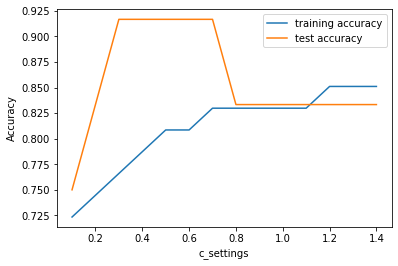

In [17]:
training_accuracy = []
test_accuracy = []
c_settings = np.arange(0.1,1.5,0.1)
for i in c_settings:
    logreg = LogisticRegression(C=i).fit(X_train_scale1, y_train)
    training_accuracy.append(logreg.score(X_train_scale1, y_train))
    test_accuracy.append(logreg.score(X_test_scale1, y_test))

plt.plot(c_settings, training_accuracy, label="training accuracy")
plt.plot(c_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("c_settings")
plt.legend()
plt.show()

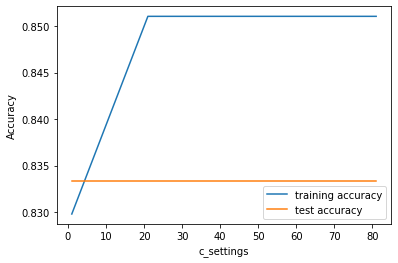

In [18]:
training_accuracy = []
test_accuracy = []
c_settings = np.arange(1,100,20)
for i in c_settings:
    logreg = LogisticRegression(C=i).fit(X_train_scale1, y_train)
    training_accuracy.append(logreg.score(X_train_scale1, y_train))
    test_accuracy.append(logreg.score(X_test_scale1, y_test))

plt.plot(c_settings, training_accuracy, label="training accuracy")
plt.plot(c_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("c_settings")
plt.legend()
plt.show()

In [19]:
logreg = LogisticRegression(C=0.7).fit(X_train_scale1, y_train)
print("Accuracy of Logistic Regression Classifier on Training Set: {:.3f}".format(logreg.score(X_train_scale1, y_train)))
print("Accuracy of Logistic Regression Classifier on Test Set:  {:.3f}".format(logreg.score(X_test_scale1, y_test)))

Accuracy of Logistic Regression Classifier on Training Set: 0.830
Accuracy of Logistic Regression Classifier on Test Set:  0.917


In [20]:
arr = np.array([[172,7.4,7.0,0.89],[196,7.3,10.1,0.72]])
print("Predict given values by Logistic Regression Classifier:\n",arr)
arr = scaler.transform(arr)
print(knc.predict(arr))

Predict given values by Logistic Regression Classifier:
 [[172.     7.4    7.     0.89]
 [196.     7.3   10.1    0.72]]
[1 4]


### Logistic Regression Achieved accuracy of 0.917 on test test

# K Neighbour is better than Logistic Regression